# Labotratorio 5
- Irving Acosta 22781
- Sebastián Huertas 22295
- Josué Marroquín 22

## Ejercicio 1

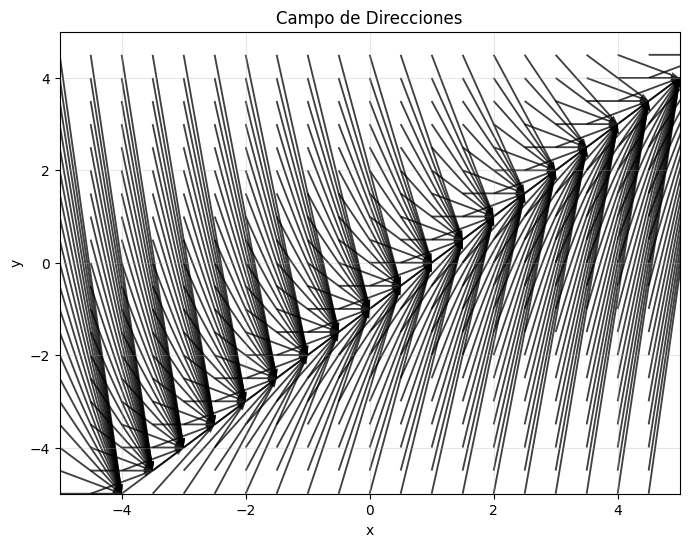

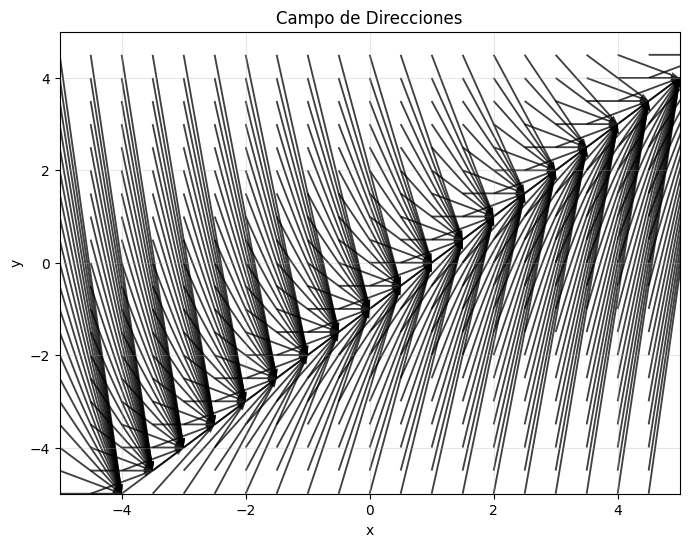

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_direction_field(f, xmin, xmax, ymin, ymax, xstep, ystep, unitary=False):
    """
    Grafica el campo de direcciones asociado a una ecuación diferencial de primer orden.

    Parámetros:
        f: Función que define la ecuación diferencial dy/dx = f(x, y).
        xmin, xmax: Límites del eje x.
        ymin, ymax: Límites del eje y.
        xstep, ystep: Separación entre puntos en el grid de los ejes x e y.
        unitary: Booleano para graficar el campo unitario (True) o el campo original (False).

    Retorna:
        Una figura con el campo de direcciones.
    """
    # Crear el grid de puntos
    x = np.arange(xmin, xmax, xstep)
    y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(x, y)

    # Evaluar la función f en el grid
    U = np.ones_like(X)
    V = f(X, Y)

    # Normalizar el campo si se requiere el campo unitario
    if unitary:
        magnitude = np.sqrt(U**2 + V**2)
        U = U / magnitude
        V = V / magnitude

    # Crear la figura
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, alpha=0.75)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Campo de Direcciones')
    ax.grid(True, alpha=0.3)

    # plt.show()
    return fig

# Ejemplo de uso
def example_function(x, y):
    return x - y

plot_direction_field(example_function, -5, 5, -5, 5, 0.5, 0.5, unitary=False)

## Ejercicio 2

### i) $y' = -xy$

Separar variables: $\frac{1}{y} \frac{dy}{dx} = -x$

Integrar: $\int \frac{1}{y} dy = \int -x dx$

Resultado: $\ln|y| = -\frac{x^2}{2} + C$

Despejar: $y = Ce^{-x^2/2}$ (donde $C \neq 0$). También $y = 0$ es solución para $C = 0$.

### ii) $y' = xy$

Separar variables: $\frac{1}{y} \frac{dy}{dx} = x$

Integrar: $\int \frac{1}{y} dy = \int x dx$

Resultado: $\ln|y| = \frac{x^2}{2} + C$

Despejar: $y = Ce^{x^2/2}$ (donde $y = 0$ si $C = 0$)

### iii) $x dx + y dy = 0$

Reconocer diferenciales: esto es $d\left(\frac{x^2}{2} + \frac{y^2}{2}\right) = 0$

Integrar: $\frac{1}{2}x^2 + \frac{1}{2}y^2 = C$

Multiplicar por 2: $x^2 + y^2 = R^2$ (con $R^2 = 2C$)

Curvas solución: círculos centrados en el origen ($R \geq 0$).

Para graficar: $y = \pm \sqrt{R^2 - x^2}$

### iv) $y dx + x dy = 0$

Reconocer: $d(xy) = x dy + y dx = 0$

Integrar: $xy = C$

Curvas solución: hipérbolas (si $C = 0$ da las rectas $xy = 0$).

Para graficar: $y = \frac{C}{x}$ (evitar $x = 0$)

### v) $\frac{dy}{dx} = y^2 - y = y(y - 1)$

Separar variables: $\frac{dy}{y(y - 1)} = dx$

Descomposición en fracciones parciales: $\frac{1}{y(y-1)} = -\frac{1}{y} + \frac{1}{y-1}$

Integrar: $\int\left(-\frac{1}{y} + \frac{1}{y-1}\right) dy = \int dx$

Resultado: $-\ln|y| + \ln|y-1| = x + C \Rightarrow \ln\left|\frac{y-1}{y}\right| = x + C$

Exponenciar: $\frac{y - 1}{y} = Ke^{x}$ (donde $K = e^{C}$)

Despejar $y$: $1 - \frac{1}{y} = Ke^{x} \Rightarrow \frac{1}{y} = 1 - Ke^{x} \Rightarrow y = \frac{1}{1 - Ke^{x}}$

Observaciones: $y = 0$ y $y = 1$ son soluciones constantes (equilibrios).

Cuidar singularidades cuando $1 - Ke^{x} = 0$.

### Curva solucion y esbozo

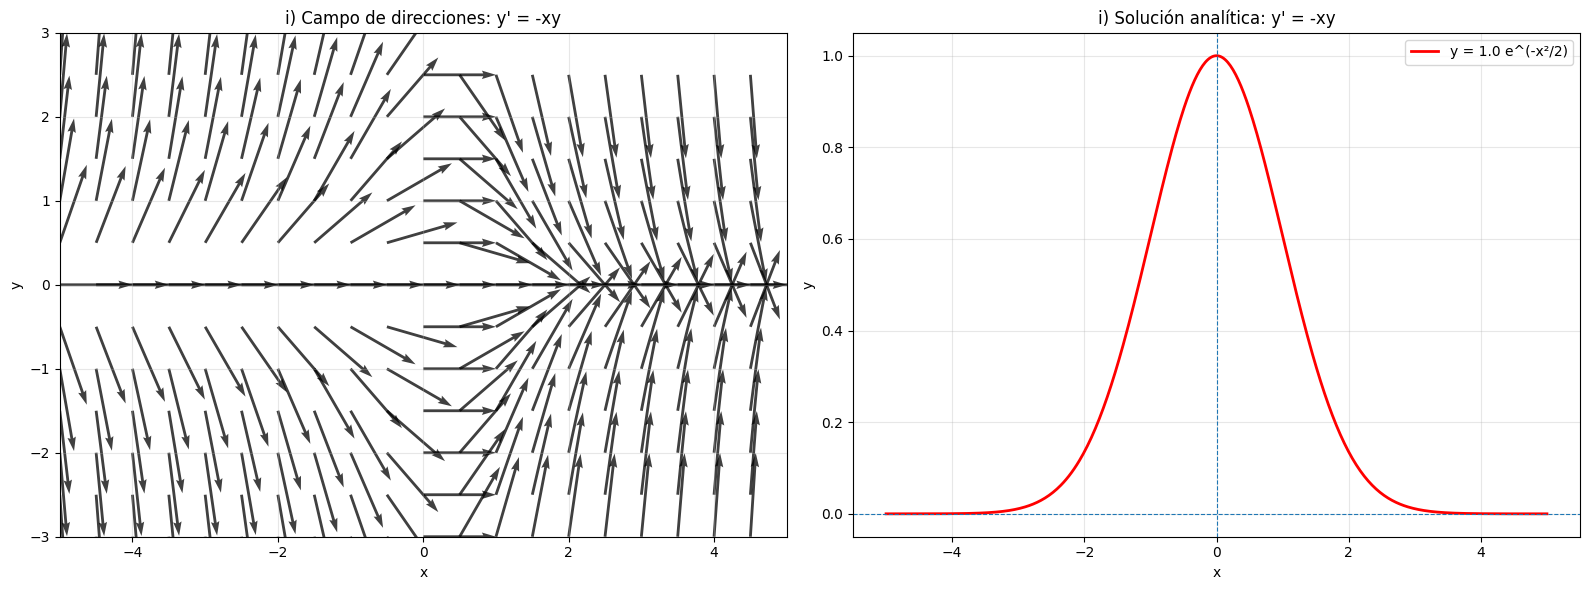

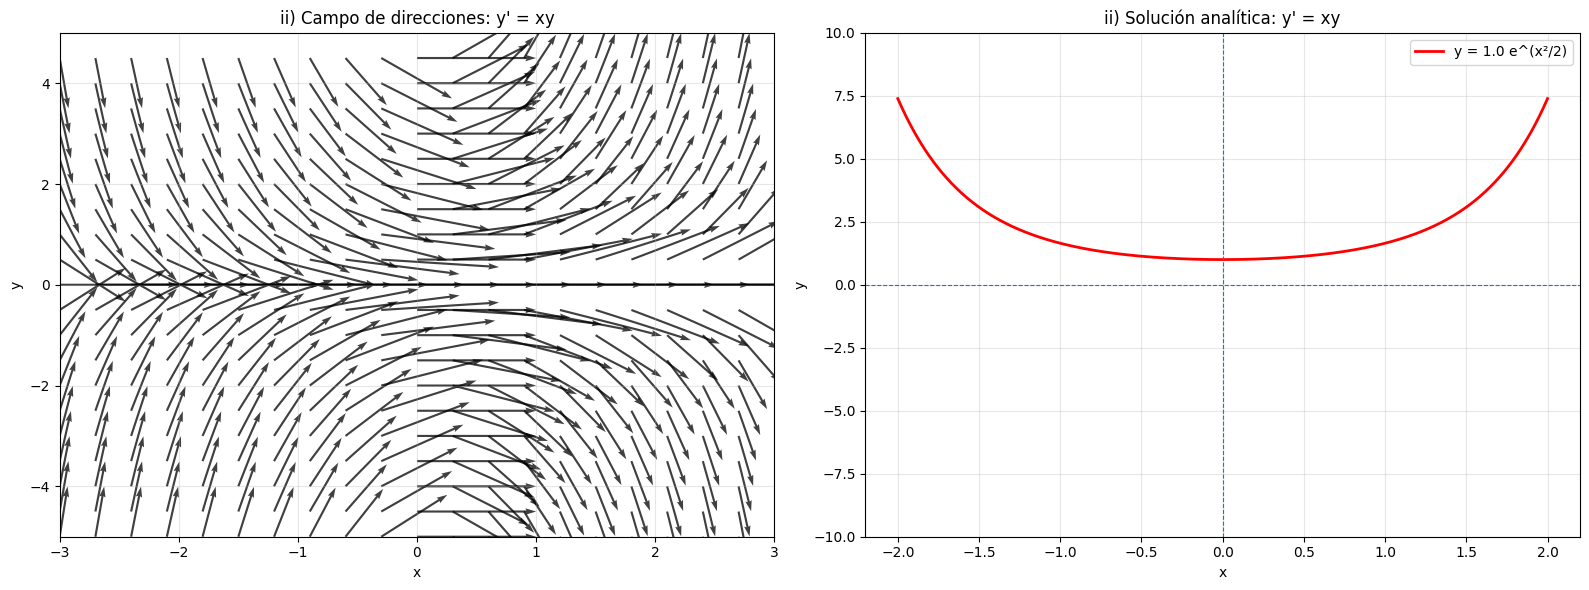

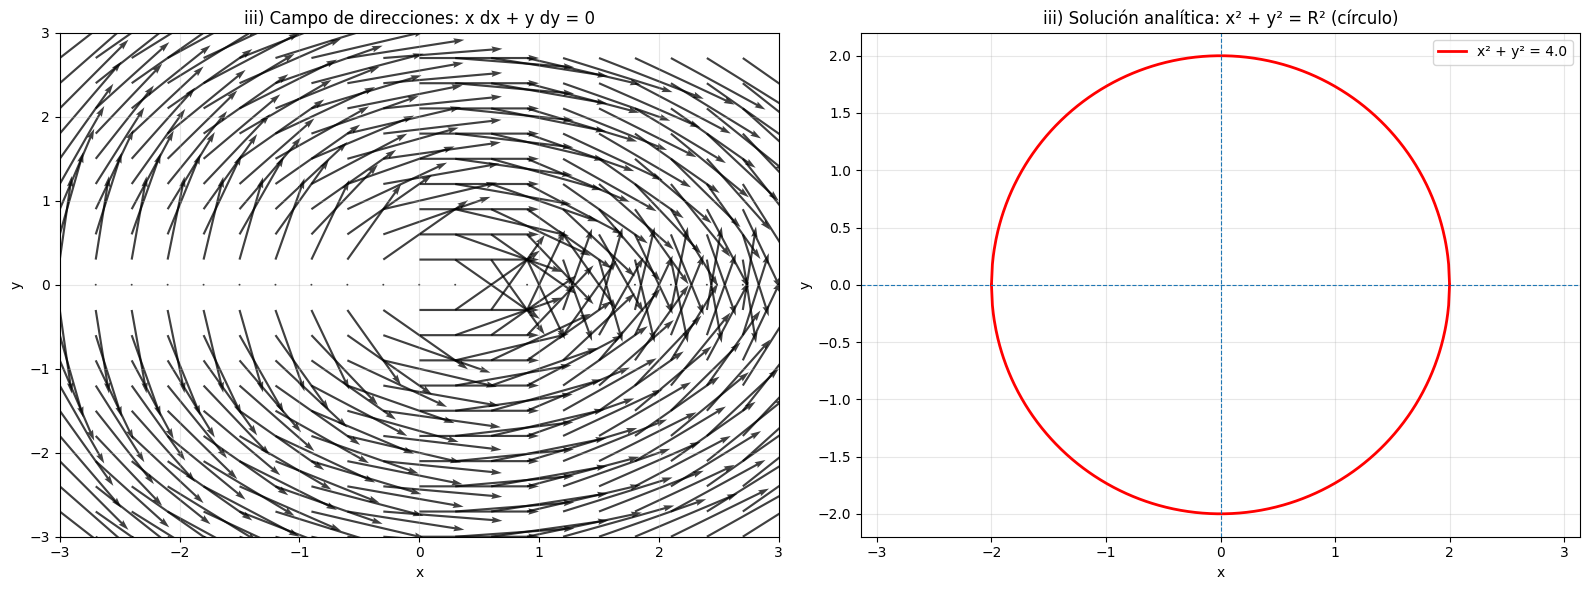

C:\Users\josue\AppData\Local\Temp\ipykernel_11392\4081909230.py:129: RuntimeWarning: divide by zero encountered in divide
  return np.where(np.abs(x) > 1e-8, -y/x, np.nan)
C:\Users\josue\AppData\Local\Temp\ipykernel_11392\4081909230.py:129: RuntimeWarning: invalid value encountered in divide
  return np.where(np.abs(x) > 1e-8, -y/x, np.nan)


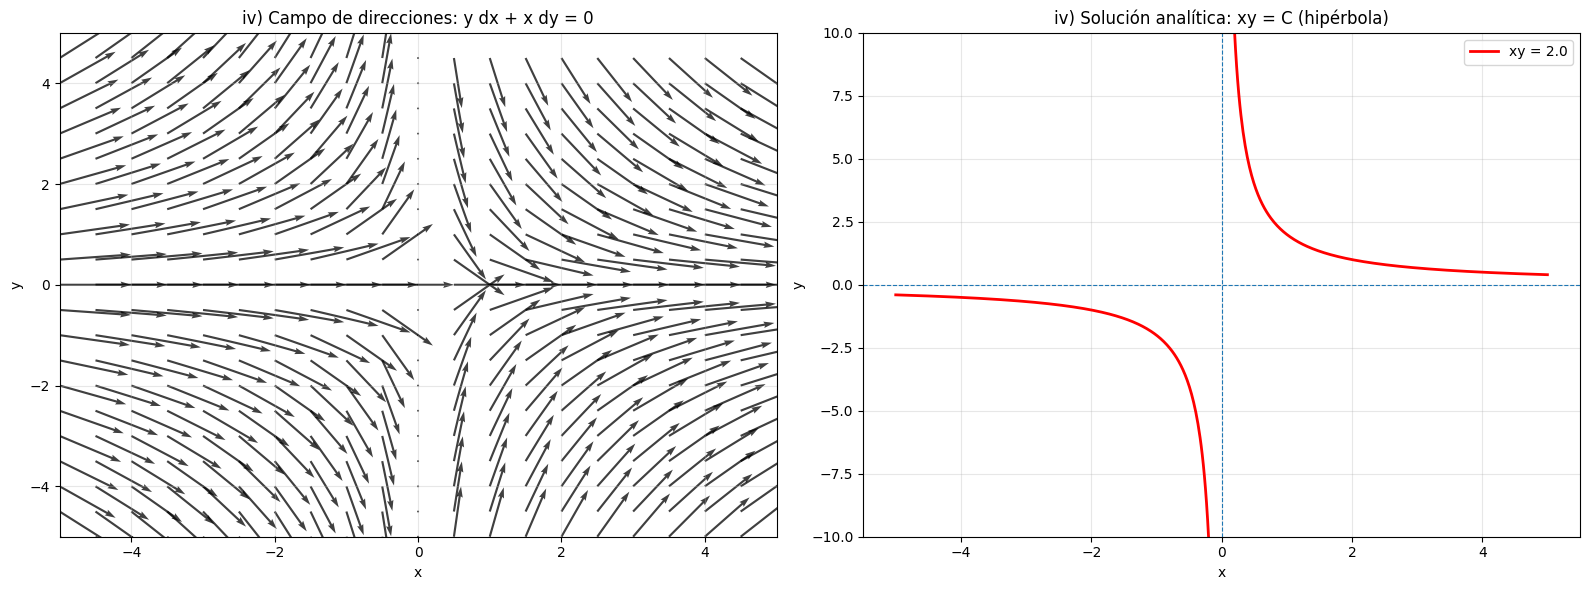

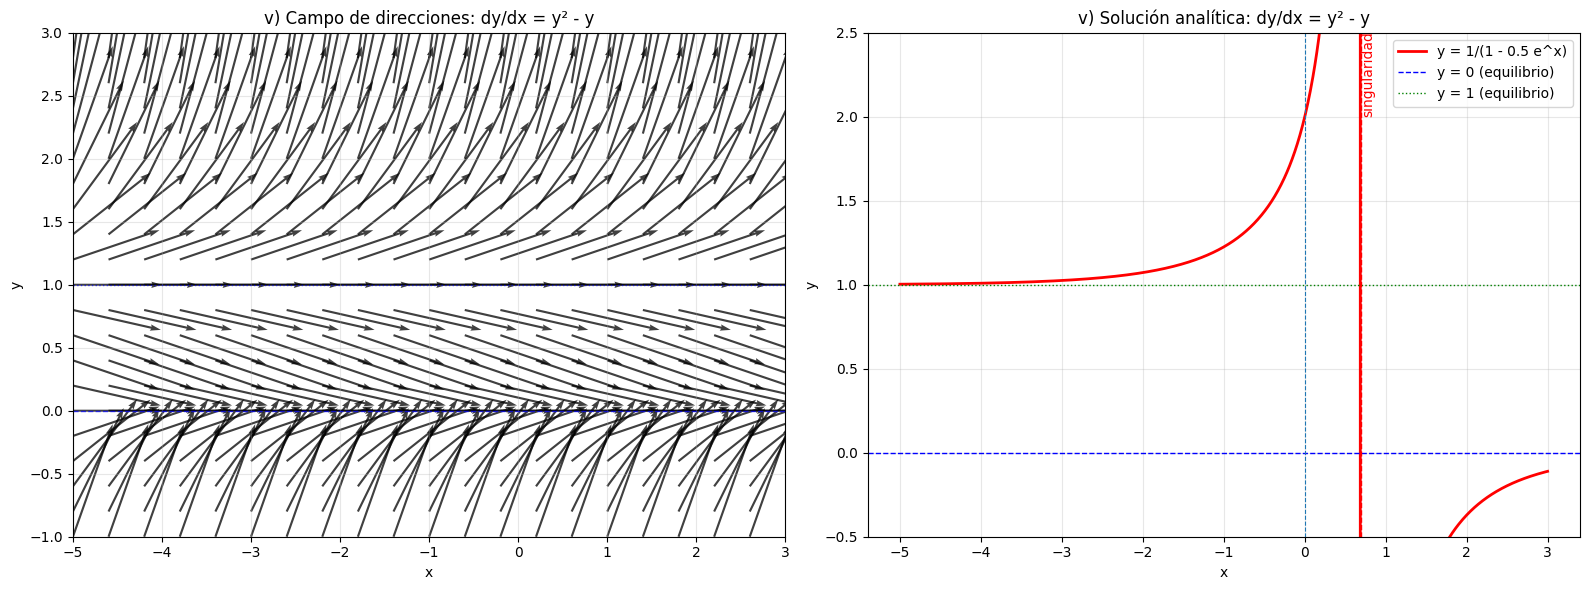

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Función auxiliar para graficar campo de direcciones en un axis específico
def plot_direction_field_ax(ax, f, xmin, xmax, ymin, ymax, xstep, ystep, unitary=False):
    """Versión de plot_direction_field para usar en subplots"""
    x = np.arange(xmin, xmax, xstep)
    y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(x, y)
    
    U = np.ones_like(X)
    V = f(X, Y)
    
    if unitary:
        magnitude = np.sqrt(U**2 + V**2)
        U = np.where(magnitude > 0, U / magnitude, 0)
        V = np.where(magnitude > 0, V / magnitude, 0)
    
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, alpha=0.75)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True, alpha=0.3)

# ==========================
# i) y' = -x y  -> y = C * exp(-x^2/2)
# ==========================
def edo_i(x, y):
    return -x * y

def sol_i(x, C):
    return C * np.exp(-x**2 / 2)

x_vals = np.linspace(-5, 5, 500)
C_i = 1.0
y_i = sol_i(x_vals, C_i)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Campo de direcciones
plot_direction_field_ax(ax1, edo_i, -5, 5, -3, 3, 0.5, 0.5, unitary=True)
ax1.set_title("i) Campo de direcciones: y' = -xy")

# Solución analítica
ax2.plot(x_vals, y_i, label=f'y = {C_i} e^(-x²/2)', linewidth=2, color='red')
ax2.axhline(0, linestyle='--', linewidth=0.8)
ax2.axvline(0, linestyle='--', linewidth=0.8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title("i) Solución analítica: y' = -xy")
ax2.grid(alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# ==========================
# ii) y' = x y  -> y = C * exp(x^2/2)
# ==========================
def edo_ii(x, y):
    return x * y

def sol_ii(x, C):
    return C * np.exp(x**2 / 2)

C_ii = 1.0
x_vals_ii = np.linspace(-2, 2, 500)  # rango más pequeño para evitar overflow
y_ii_small = sol_ii(x_vals_ii, C_ii)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Campo de direcciones
plot_direction_field_ax(ax1, edo_ii, -3, 3, -5, 5, 0.3, 0.5, unitary=True)
ax1.set_title("ii) Campo de direcciones: y' = xy")

# Solución analítica
ax2.plot(x_vals_ii, y_ii_small, label=f'y = {C_ii} e^(x²/2)', linewidth=2, color='red')
ax2.axhline(0, linestyle='--', linewidth=0.8)
ax2.axvline(0, linestyle='--', linewidth=0.8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title("ii) Solución analítica: y' = xy")
ax2.grid(alpha=0.3)
ax2.legend()
ax2.set_ylim(-10, 10)

plt.tight_layout()
plt.show()

# ==========================
# iii) x dx + y dy = 0  -> x^2 + y^2 = R^2 (círculos)
# ==========================
def edo_iii(x, y):
    # x dx + y dy = 0 -> dy/dx = -x/y
    return np.where(np.abs(y) > 1e-8, -x/y, np.nan)

R = 2.0
x_circle = np.linspace(-R, R, 500)
y_circle_pos = np.sqrt(np.clip(R**2 - x_circle**2, 0, None))
y_circle_neg = -y_circle_pos

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Campo de direcciones
plot_direction_field_ax(ax1, edo_iii, -3, 3, -3, 3, 0.3, 0.3, unitary=True)
ax1.set_title("iii) Campo de direcciones: x dx + y dy = 0")

# Solución analítica
ax2.plot(x_circle, y_circle_pos, linewidth=2, label=f'x² + y² = {R**2}', color='red')
ax2.plot(x_circle, y_circle_neg, linewidth=2, color='red')
ax2.axhline(0, linestyle='--', linewidth=0.8)
ax2.axvline(0, linestyle='--', linewidth=0.8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title("iii) Solución analítica: x² + y² = R² (círculo)")
ax2.grid(alpha=0.3)
ax2.legend()
ax2.axis('equal')

plt.tight_layout()
plt.show()

# ==========================
# iv) y dx + x dy = 0  -> x y = C  (hipérbolas)
# ==========================
def edo_iv(x, y):
    # y dx + x dy = 0 -> dy/dx = -y/x
    return np.where(np.abs(x) > 1e-8, -y/x, np.nan)

def sol_iv(x, C):
    return C / x

x_vals_iv_left = np.linspace(-5, -0.1, 300)
x_vals_iv_right = np.linspace(0.1, 5, 300)
C_iv = 2.0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Campo de direcciones
plot_direction_field_ax(ax1, edo_iv, -5, 5, -5, 5, 0.5, 0.5, unitary=True)
ax1.set_title("iv) Campo de direcciones: y dx + x dy = 0")

# Solución analítica
ax2.plot(x_vals_iv_left, sol_iv(x_vals_iv_left, C_iv), linewidth=2, label=f'xy = {C_iv}', color='red')
ax2.plot(x_vals_iv_right, sol_iv(x_vals_iv_right, C_iv), linewidth=2, color='red')
ax2.axhline(0, linestyle='--', linewidth=0.8)
ax2.axvline(0, linestyle='--', linewidth=0.8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title("iv) Solución analítica: xy = C (hipérbola)")
ax2.grid(alpha=0.3)
ax2.legend()
ax2.set_ylim(-10, 10)

plt.tight_layout()
plt.show()

# ==========================
# v) dy/dx = y^2 - y  -> y = 1 / (1 - K e^{x})
# ==========================
def edo_v(x, y):
    return y**2 - y

def sol_v(x, K):
    denom = 1 - K * np.exp(x)
    y = np.full_like(x, np.nan, dtype=float)
    mask = np.abs(denom) > 1e-8
    y[mask] = 1.0 / denom[mask]
    return y

x_vals_v = np.linspace(-5, 3, 1000)
K_v = 0.5
y_v = sol_v(x_vals_v, K_v)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Campo de direcciones
plot_direction_field_ax(ax1, edo_v, -5, 3, -1, 3, 0.4, 0.2, unitary=True)
ax1.axhline(0, linestyle='--', linewidth=1, color='blue', alpha=0.7)
ax1.axhline(1, linestyle=':', linewidth=1, color='blue', alpha=0.7)
ax1.set_title("v) Campo de direcciones: dy/dx = y² - y")

# Solución analítica
ax2.plot(x_vals_v, y_v, linewidth=2, label=f'y = 1/(1 - {K_v} e^x)', color='red')
ax2.axhline(0, linestyle='--', linewidth=1, label='y = 0 (equilibrio)', color='blue')
ax2.axhline(1, linestyle=':', linewidth=1, label='y = 1 (equilibrio)', color='green')
ax2.axvline(0, linestyle='--', linewidth=0.8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title("v) Solución analítica: dy/dx = y² - y")
ax2.grid(alpha=0.3)
ax2.legend()
ax2.set_ylim(-0.5, 2.5)

# Marcar singularidades
if K_v > 0:
    x_sing = np.log(1.0 / K_v)
    if x_vals_v.min() < x_sing < x_vals_v.max():
        ax2.axvline(x_sing, color='red', linestyle='--', linewidth=1)
        ax2.text(x_sing, 2.0, 'singularidad', rotation=90, color='red', va='bottom')

plt.tight_layout()
plt.show()

## Ejercicio 3

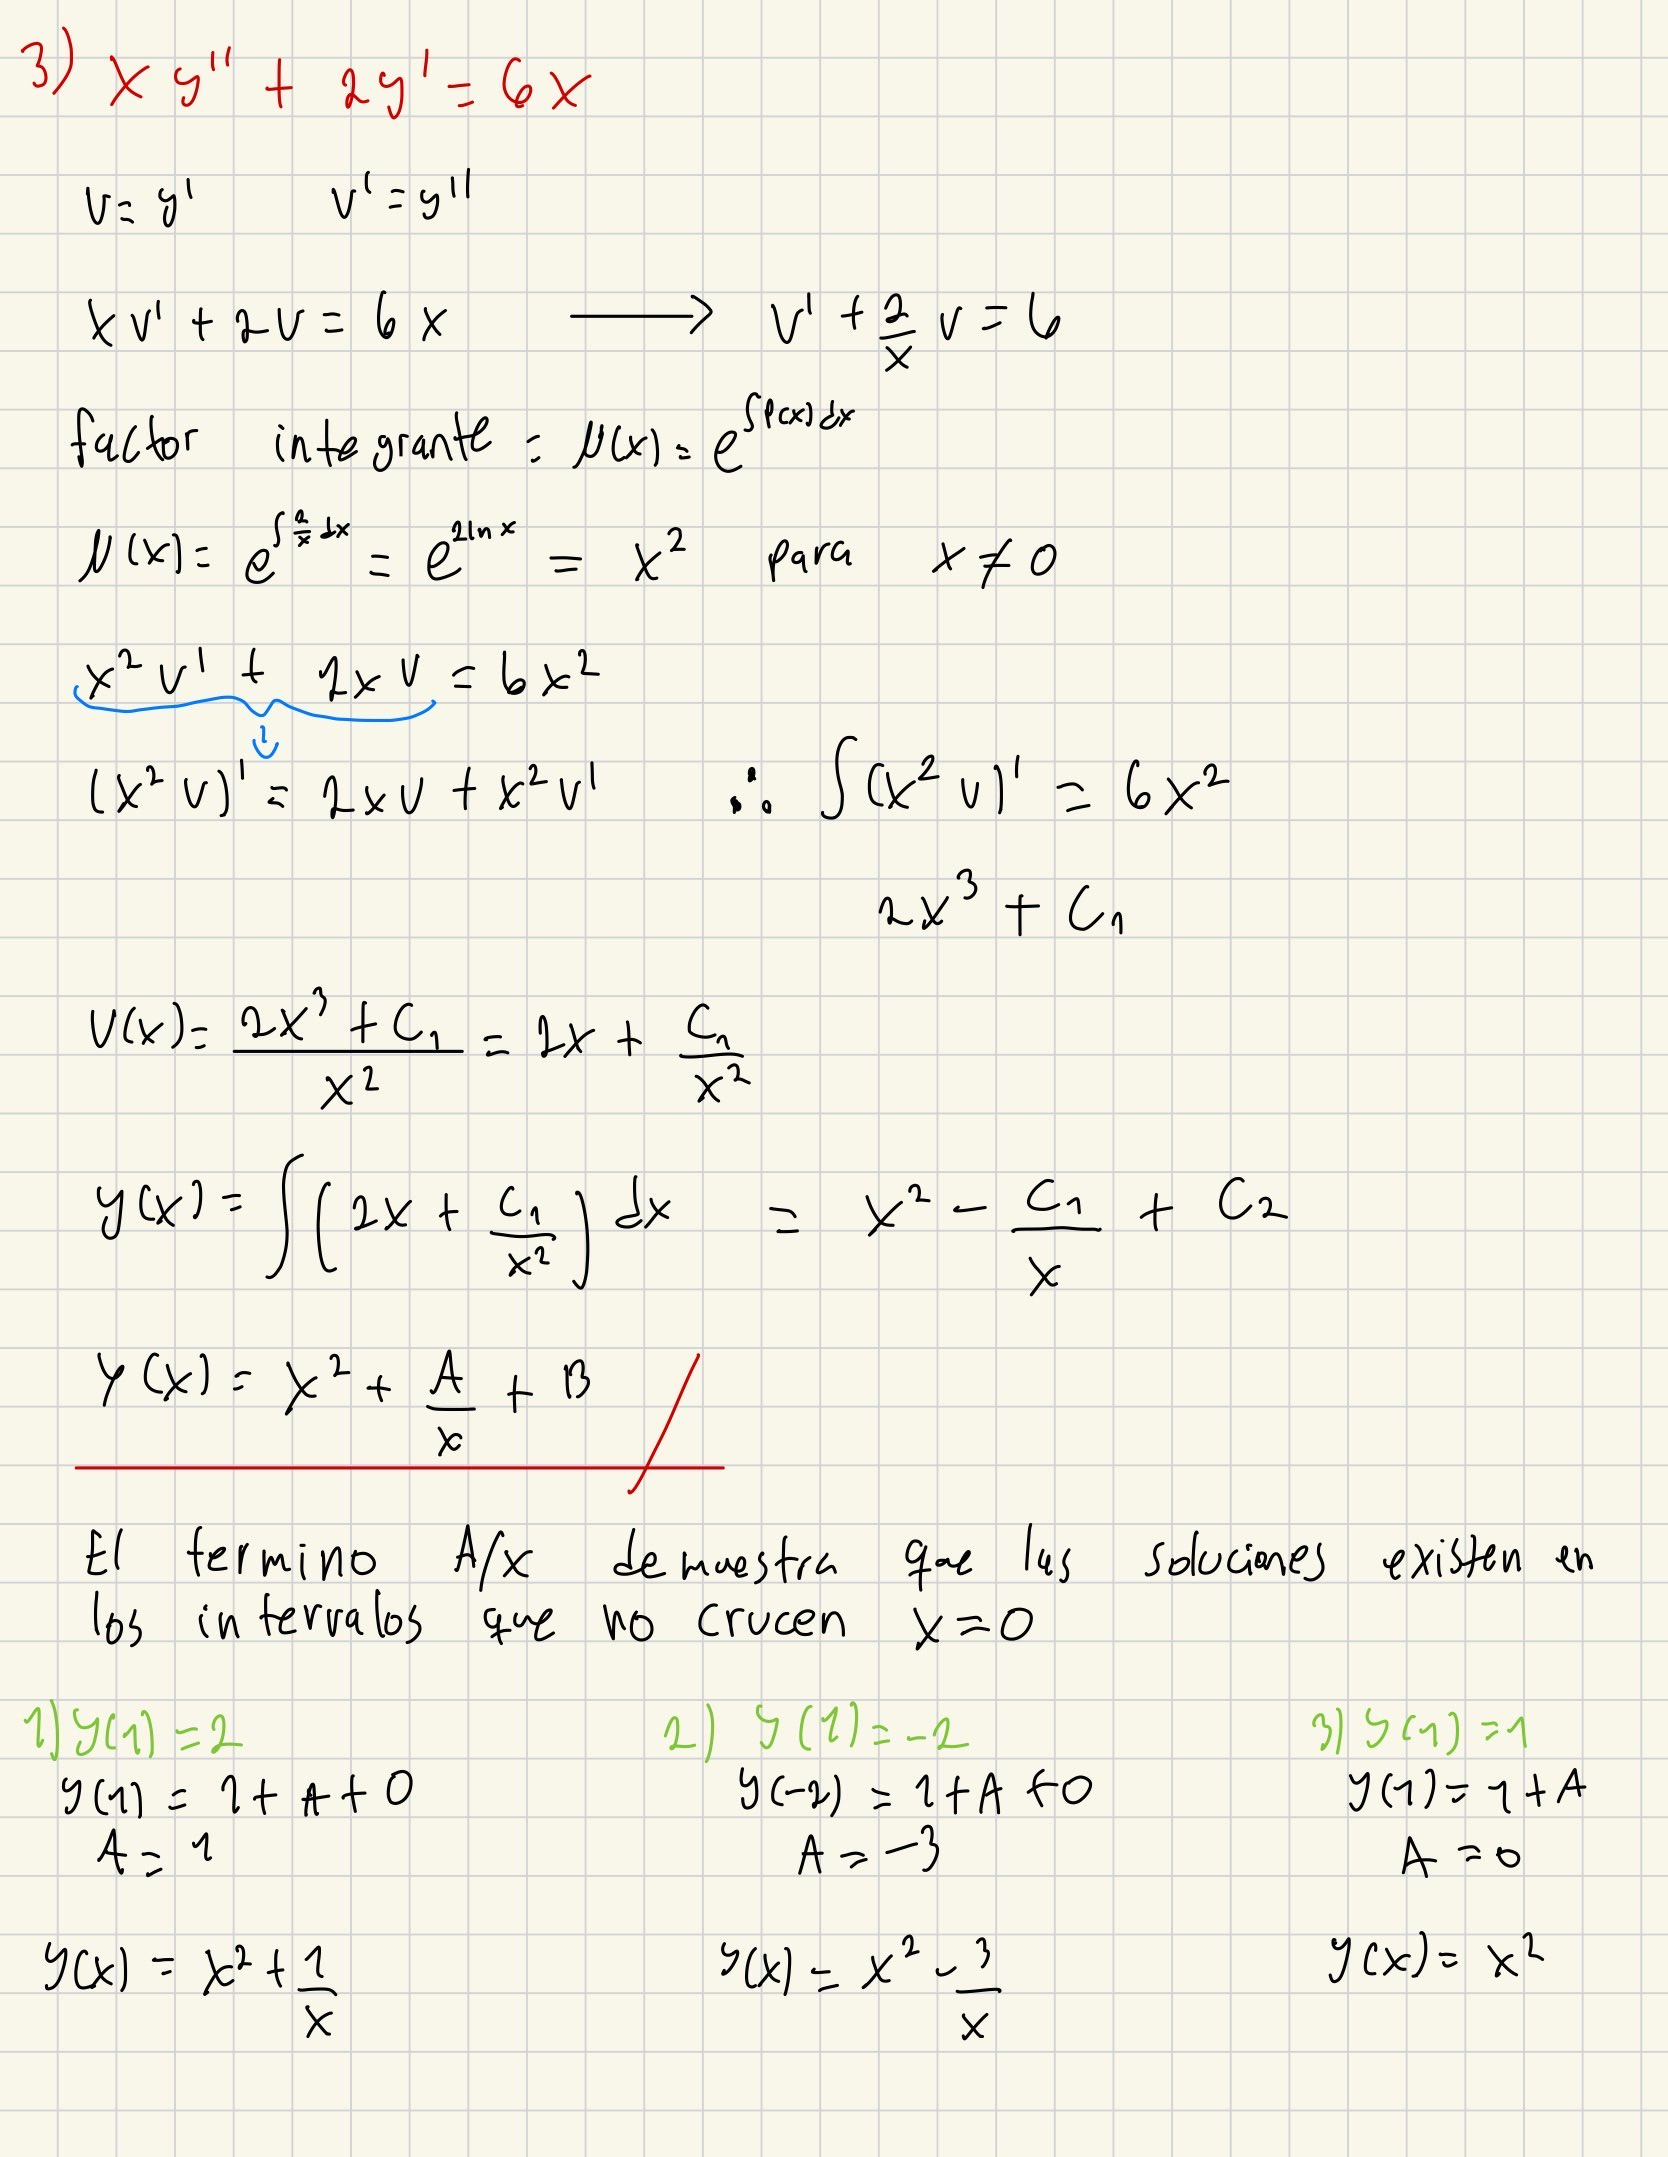
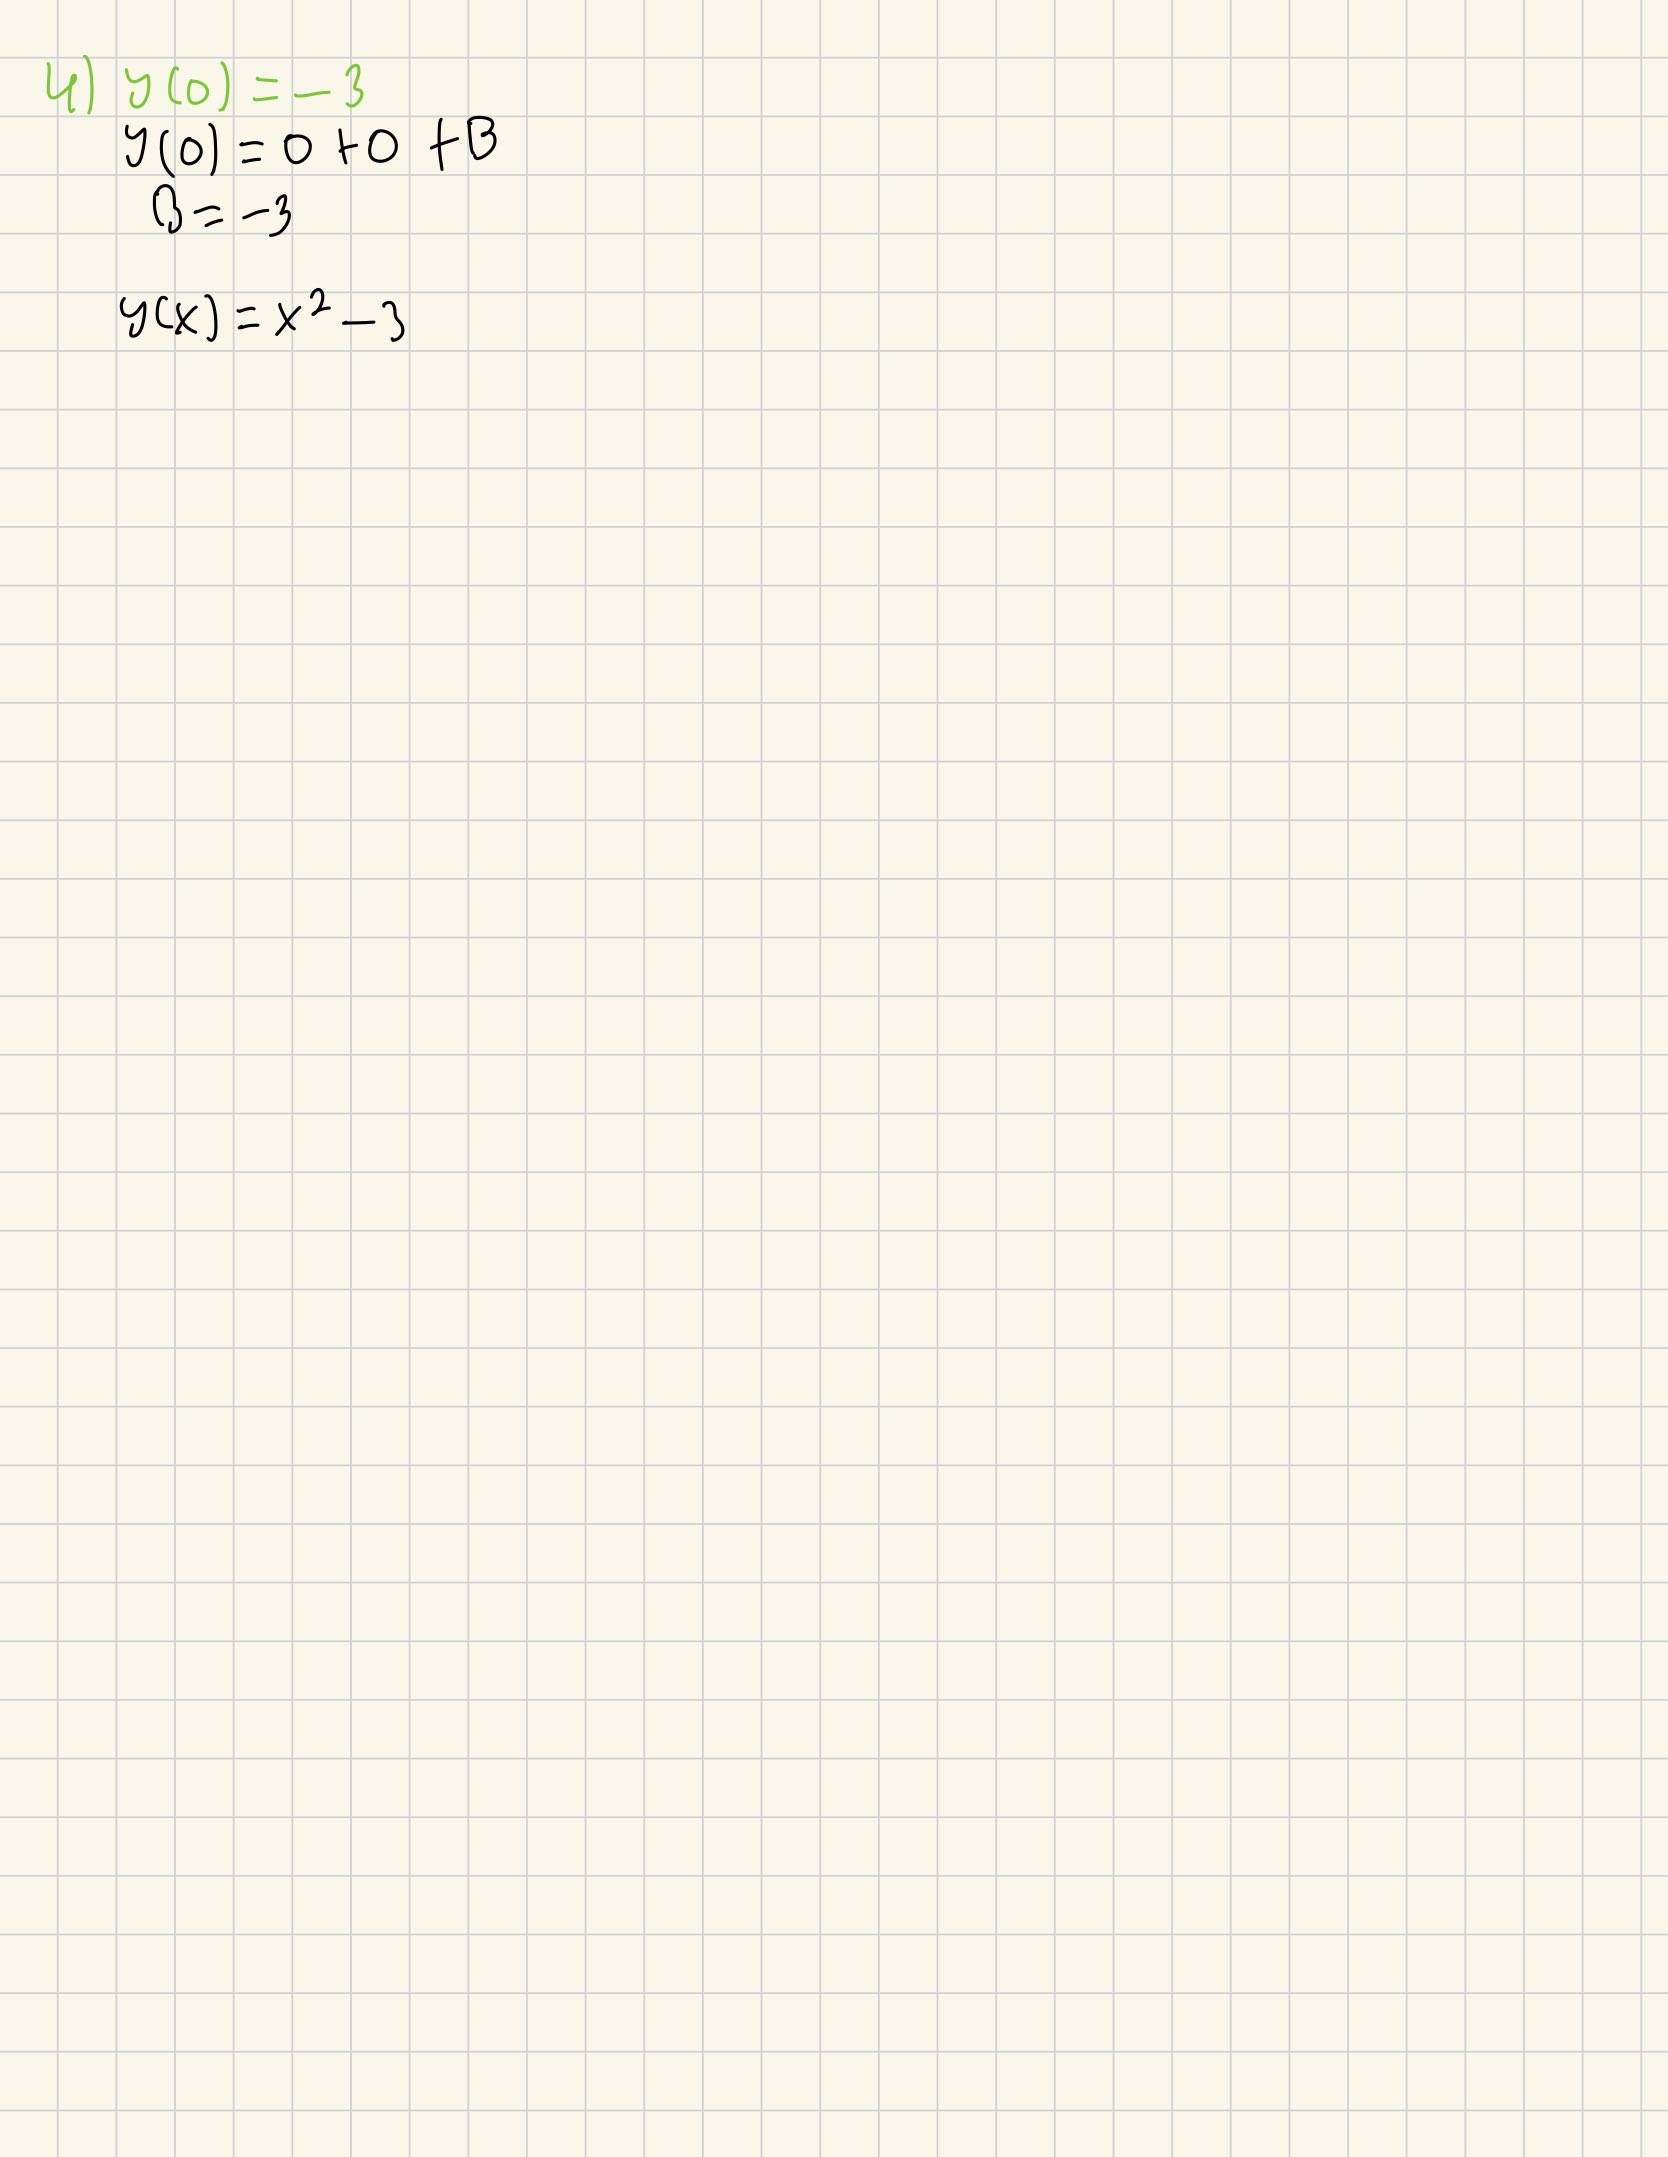

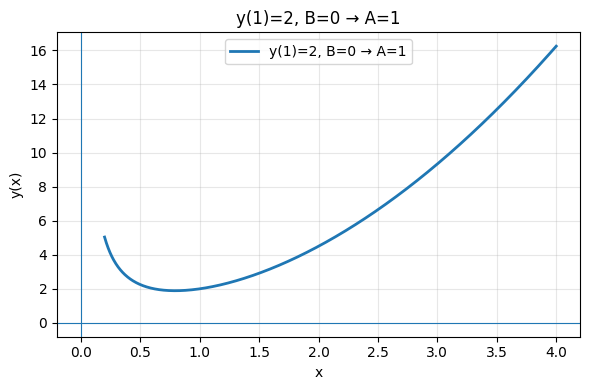

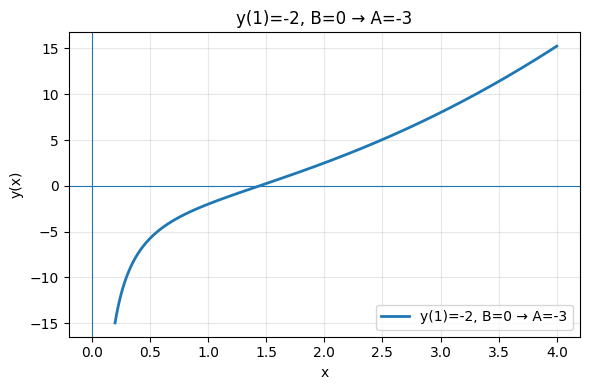

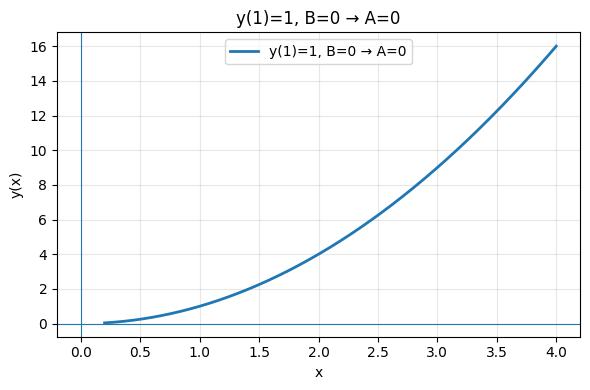

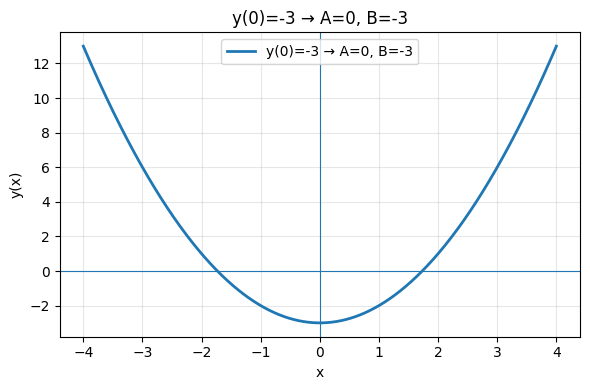

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Solución general: y = x^2 + A/x + B
def y_general(x, A=0.0, B=0.0):
    return x**2 + A/x + B

def plot_case(title, f, x_range, filename):
    xs = np.linspace(x_range[0], x_range[1], 1000)
    ys = f(xs)

    plt.figure(figsize=(6, 4))
    plt.plot(xs, ys, label=title, linewidth=2.0)
    plt.axhline(0, linewidth=0.8)
    plt.axvline(0, linewidth=0.8)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Casos con B=0 y dato en x=1
    # 1) y(1)=2  => 1 + A = 2  -> A = 1
    A1, B1 = 1.0, 0.0
    # 2) y(1)=-2 => 1 + A = -2 -> A = -3
    A2, B2 = -3.0, 0.0
    # 3) y(1)=1  => 1 + A = 1  -> A = 0
    A3, B3 = 0.0, 0.0

    # 4) y(0)=-3: para ser finita en x=0 debe A=0; B=-3
    A4, B4 = 0.0, -3.0

    plot_case(
        "y(1)=2, B=0 → A=1",
        lambda x: y_general(x, A=A1, B=B1),
        (0.2, 4.0),
        "y_1_eq_2_B0_A1.png",
    )

    plot_case(
        "y(1)=-2, B=0 → A=-3",
        lambda x: y_general(x, A=A2, B=B2),
        (0.2, 4.0),
        "y_1_eq_-2_B0_A-3.png",
    )

    plot_case(
        "y(1)=1, B=0 → A=0",
        lambda x: y_general(x, A=A3, B=B3),
        (0.2, 4.0),
        "y_1_eq_1_B0_A0.png",
    )

    plot_case(
        "y(0)=-3 → A=0, B=-3",
        lambda x: y_general(x, A=A4, B=B4),
        (-4.0, 4.0),
        "y_0_eq_-3_A0_B-3.png",
    )


## Ejercicio 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Definición del modelo
# ==========================
def N(x, y):
    return x - 3*y - 3*(x**2 - y**2) + 3*x*y

def D(x, y):
    return 2*x - y + 3*(x**2 - y**2) + 2*x*y

def f(x, y):
    den = D(x, y)
    return np.where(np.abs(den) > 1e-12, N(x, y)/den, np.nan)


# ==========================
# Utilidades numéricas
# ==========================
def slope_field(ax, x_min, x_max, y_min, y_max, nx=25, ny=25):
    """Dibuja el campo de direcciones (inciso a)."""
    xs = np.linspace(x_min, x_max, nx)
    ys = np.linspace(y_min, y_max, ny)
    X, Y = np.meshgrid(xs, ys)
    F = f(X, Y)

    U = np.ones_like(F)
    V = F
    norm = np.sqrt(1 + np.nan_to_num(F, nan=0.0)**2)
    Uu = U / norm
    Vv = np.where(np.isfinite(F), V / norm, 0.0)

    ax.quiver(X, Y, Uu, Vv, angles="xy", scale_units="xy",
              scale=0.9, width=0.003, alpha=0.6)
    ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max)
    ax.set_xlabel("x"); ax.set_ylabel("y")
    ax.grid(True, alpha=0.3)

def rk4_step(x, y, h, func):
    """Un paso de Runge–Kutta 4 (para inciso b)."""
    k1 = func(x, y)
    k2 = func(x + 0.5*h, y + 0.5*h*k1)
    k3 = func(x + 0.5*h, y + 0.5*h*k2)
    k4 = func(x + h, y + h*k3)
    return y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def integrate_ivp(x0, y0, x_end, h, func, max_slope=1e3):
    """
    Integra y' = func(x,y) de x0 a x_end con RK4.
    Detiene si slope no finita o muy grande (singularidad).
    """
    sign = 1 if x_end >= x0 else -1
    h = abs(h)*sign
    xs = [x0]; ys = [y0]
    x = x0; y = y0
    while (x - x_end)*sign < 0:
        s = func(x, y)
        if not np.isfinite(s) or abs(s) > max_slope:
            break
        x_next = x + h
        y = rk4_step(x, y, h, func)
        x = x_next
        xs.append(x); ys.append(y)
    return np.array(xs), np.array(ys)

def F_vec(z):
    """Campo vectorial 2D para equilibrios (inciso c)."""
    x, y = z
    return np.array([N(x, y), D(x, y)], dtype=float)

def newton2d(z0, tol=1e-10, itmax=50, eps=1e-6):
    """Newton 2D con jacobiano numérico para resolver F_vec(z)=0."""
    z = np.array(z0, dtype=float)
    for _ in range(itmax):
        Fx = F_vec(z)
        if np.linalg.norm(Fx, ord=2) < tol:
            return z, True
        J = np.zeros((2, 2), dtype=float)
        for i in range(2):
            dz = np.zeros(2); dz[i] = eps
            J[:, i] = (F_vec(z + dz) - F_vec(z - dz)) / (2*eps)
        try:
            step = np.linalg.solve(J, -Fx)
        except np.linalg.LinAlgError:
            return z, False
        z = z + step
    return z, False

def find_equilibria(x_range, y_range, m=11, tol_merge=1e-4):
    """Barrido de puntos iniciales y fusión de raíces cercanas."""
    inits_x = np.linspace(x_range[0], x_range[1], m)
    inits_y = np.linspace(y_range[0], y_range[1], m)
    roots = []
    for xi in inits_x:
        for yi in inits_y:
            z, ok = newton2d((xi, yi))
            if ok and np.all(np.isfinite(z)):
                roots.append(z)
    unique = []
    for r in roots:
        if not any(np.linalg.norm(r - u) < tol_merge for u in unique):
            unique.append(r)
    return np.array(unique)


In [ ]:
# ==========================
# Parámetros globales
# ==========================
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0
x0, y0 = 1.5, 0.0  

INCISO (a): Graficando el campo de direcciones de y' = f(x,y) ...


C:\Users\josue\AppData\Local\Temp\ipykernel_11392\2787886122.py:15: RuntimeWarning: divide by zero encountered in divide
  return np.where(np.abs(den) > 1e-12, N(x, y)/den, np.nan)
C:\Users\josue\AppData\Local\Temp\ipykernel_11392\2787886122.py:15: RuntimeWarning: invalid value encountered in divide
  return np.where(np.abs(den) > 1e-12, N(x, y)/den, np.nan)


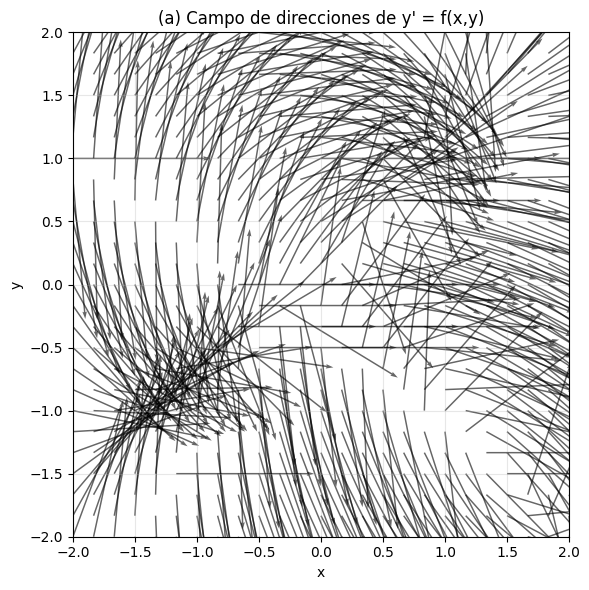

In [ ]:
# ==========================
# INCISO (a): Campo de direcciones
# ==========================
print("INCISO (a): Graficando el campo de direcciones de y' = f(x,y) ...")
fig_a, ax_a = plt.subplots(figsize=(6, 6))
slope_field(ax_a, x_min, x_max, y_min, y_max, nx=25, ny=25)
ax_a.set_title("(a) Campo de direcciones de y' = f(x,y)")
plt.tight_layout()
plt.show()

INCISO (b): Integrando el PVI y(1.5)=0 con RK4 y superponiendo al campo ...


C:\Users\josue\AppData\Local\Temp\ipykernel_11392\2787886122.py:15: RuntimeWarning: divide by zero encountered in divide
  return np.where(np.abs(den) > 1e-12, N(x, y)/den, np.nan)
C:\Users\josue\AppData\Local\Temp\ipykernel_11392\2787886122.py:15: RuntimeWarning: invalid value encountered in divide
  return np.where(np.abs(den) > 1e-12, N(x, y)/den, np.nan)


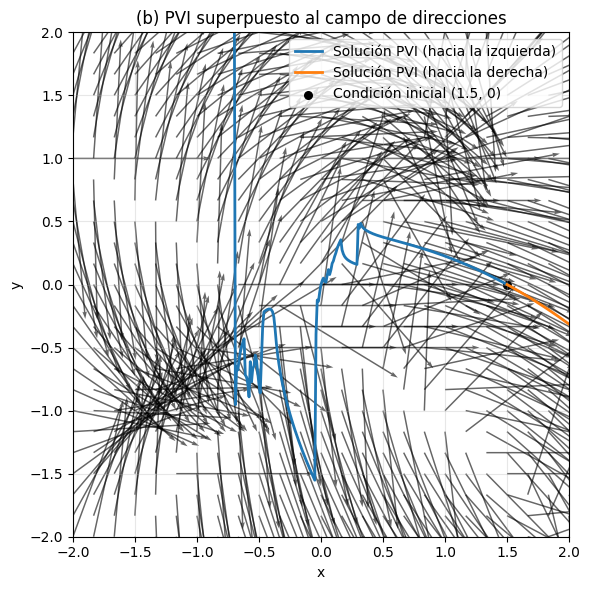

INCISO (b): Segmentos computados: izquierda=351 puntos, derecha=51 puntos.


In [ ]:

# ==========================
# INCISO (b): Solución del PVI y(1.5)=0
# ==========================
print("INCISO (b): Integrando el PVI y(1.5)=0 con RK4 y superponiendo al campo ...")
# Integramos hacia la derecha (x0 -> x_max) y hacia la izquierda (x0 -> x_min)
xs_r, ys_r = integrate_ivp(x0, y0, x_max, 0.01, f)
xs_l, ys_l = integrate_ivp(x0, y0, x_min, 0.01, f)

fig_b, ax_b = plt.subplots(figsize=(6, 6))
slope_field(ax_b, x_min, x_max, y_min, y_max, nx=25, ny=25)
ax_b.plot(xs_l, ys_l, lw=2, label="Solución PVI (hacia la izquierda)")
ax_b.plot(xs_r, ys_r, lw=2, label="Solución PVI (hacia la derecha)")
ax_b.scatter([x0], [y0], c="k", s=30, label="Condición inicial (1.5, 0)")
ax_b.set_title("(b) PVI superpuesto al campo de direcciones")
ax_b.legend()
plt.tight_layout()
plt.show()

print(f"INCISO (b): Segmentos computados: izquierda={len(xs_l)} puntos, derecha={len(xs_r)} puntos.")
if len(xs_l) == 0 or len(xs_r) == 0:
    print("INCISO (b): Advertencia: integración detenida cerca de una singularidad (denominador D≈0 o |f| grande).")

INCISO (c): Buscando puntos de equilibrio resolviendo el sistema N=0, D=0 ...


C:\Users\josue\AppData\Local\Temp\ipykernel_11392\2787886122.py:15: RuntimeWarning: divide by zero encountered in divide
  return np.where(np.abs(den) > 1e-12, N(x, y)/den, np.nan)
C:\Users\josue\AppData\Local\Temp\ipykernel_11392\2787886122.py:15: RuntimeWarning: invalid value encountered in divide
  return np.where(np.abs(den) > 1e-12, N(x, y)/den, np.nan)


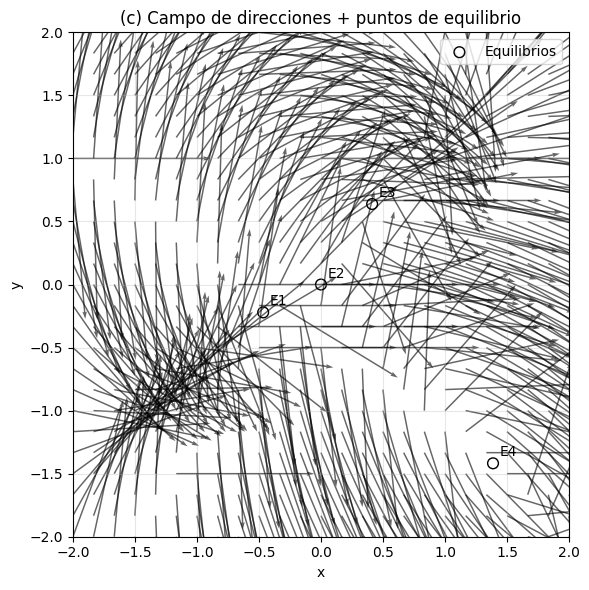

INCISO (c): Equilibrios encontrados (x, y) =
[[-4.66121209e-01 -2.20889377e-01]
 [ 6.38465913e-15  2.20006645e-15]
 [ 4.12477949e-01  6.38639191e-01]
 [ 1.38697659e+00 -1.41774981e+00]]


In [ ]:
# ==========================
# INCISO (c): Puntos de equilibrio F(x,y) = (0,0)
# ==========================
print("INCISO (c): Buscando puntos de equilibrio resolviendo el sistema N=0, D=0 ...")
eq = find_equilibria((x_min, x_max), (y_min, y_max), m=13)  # m más denso para mayor cobertura

fig_c, ax_c = plt.subplots(figsize=(6, 6))
slope_field(ax_c, x_min, x_max, y_min, y_max, nx=25, ny=25)
if eq.size:
    ax_c.scatter(eq[:, 0], eq[:, 1], s=60, marker="o",
                 edgecolor="k", facecolor="none", label="Equilibrios")
    # Etiquetas E1, E2, ...
    for i, (xe, ye) in enumerate(eq):
        ax_c.annotate(f"E{i+1}", (xe, ye), xytext=(5, 5), textcoords="offset points")
    ax_c.legend()
ax_c.set_title("(c) Campo de direcciones + puntos de equilibrio")
plt.tight_layout()
plt.show()

print("INCISO (c): Equilibrios encontrados (x, y) =")
print(eq if eq.size else "Ninguno en el rango muestreado.")

## Ejercicio 5

p = 

Solución analítica de la EDO y' = -x · y

La ecuación diferencial es: dy/dx = -x · y

Reescribimos la ecuación separando variables: (1/y) dy/dx = -x

Integrando ambos lados: ∫(1/y) dy = ∫ -x dx

Obtenemos: ln|y| = -x²/2 + C

Despejando y: y = C e^{-x²/2}

Donde C es la constante de integración (C ∈ ℝ).